# SyriaTel Customer Churn Prediction

Author: [Patrick Maina](https://github.com/Patricknmaina)

## 1. Business Understanding.

### Introduction
The telecommunications industry has become very competitive over the years, with customer retention emerging as a critical challenge. One of the major issues facing telecom providers is customer churn - a scenario where users discontinue their service, either due to dissatisfaction from the provider, or due to the availability of better alternatives. High churn rates can significantly impact a company's overall revenue, and scaling potential.

In response to this challenge, telecom companies are exploring churn prediction mechanisms, which will proactively address customer concerns, improve service delivery, and implement targeted retention strategies. In light of this, this project aims to develop a predictive model that will identify customers at risk of churning, helping SyriaTel Telecommunications company minimize churn, and enhance long-term profitability

### Problem Statement.
SyriaTel, a leading telecom provider, is experiencing a significant loss of customers who are choosing to leave its services for other competitors. To address this challenge, the company seeks to build a robust predictive model capable of identifying customers who are at risk of churning. By leveraging on data-driven insights and predictive modeling, SyriaTel aims to understand the key drivers of customer attrition, determing methods of improving long-term retention of customers, and enhance long-term customer loyalty and profitability.

### Objectives.
The main objectives for this project are:
- To determine the key characteristics and behavior patterns that contribute to customer churn.
- To build a robust predictive model that will identify customers with a high likelihood of discontinuing their service.
- To provide data-driven insights and recommendations that will proactively engage, and retain high-risk customers.

### Specific objectives
The key success metrics for this project are:
- To develop a robust churn prediction model that has a recall score of 0.8 and above.
- To identify the key features that significantly impact the performance of the model.

## 2. Data Understanding
In this step, we explore the dataset to understand what kind of information it contains. We look at the different features, their data types, and check for things like missing values or unusual patterns. This helps us get a clear picture of the data before moving on to cleaning and modeling.

### 2.1. Import Libraries
For this project, we will implement the following tools and libraries:
- `Numpy`: for numerical computations
- `Pandas`: for data loading, cleaning and manipulation
- `Seaborn`: for data visualization and EDA
- `Matplotlib`: for data visualization and EDA
- `Scikit-learn`: for data preprocessing, predictive modeling and model evaluation.
- `Imblearn`: for dealing with class imbalance.

In [1]:
# import required libraries

# data loading and manipulation
import pandas as pd
import numpy as np

# data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc

# algorithms for supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# suppress warnings for better readability
import warnings
warnings.filterwarnings('ignore')

# Set the seaborn plot size
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

### 2.2. Load the Dataset
We will load the dataset, check the info and summary statistics of the dataset.

In [2]:
# load the dataset
churn_df = pd.read_csv('data/churn.csv')
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# check the info of the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the `info()` function, we can see the following:
- The dataset contains a total of `3333` records, and `21` columns/features.
- The numerical features are about `16`, while the categorical columns are about `4`, excluding the target variable, which is `churn`.

Next, we want to check the descriptive statistics of the dataset. In this section, we will use the `describe()` function to check for:
- `count`: The total number of records in each numerical column
- `mean`: The average value in each numerical column
- `std`: The standard deviation
- `min`: The minimum value in each numerical column
- `25%`: The 25th percentile value in each numerical column
- `50%`: The 50th percentile value (median) in each numerical column
- `75%`: The 75th percentile value in each column
- `max`: The maximum value in each column

In [4]:
# check the summary statistics
churn_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


To get a better view of the shape of the dataset, as well as the numerical and categorical columns, we can do as follows:

In [5]:
# check the shape of the dataset
print(f"Number of rows: {churn_df.shape[0]}")
print(f"Numbber of columns: {churn_df.shape[1]}\n")

# display the numerical and categorical columns
print(f"Numerical columns: {churn_df.select_dtypes(include='number').columns}\n")
print(f"Categorical columns: {churn_df.select_dtypes(include='object').columns}\n")

Number of rows: 3333
Numbber of columns: 21

Numerical columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')



### 2.3. Feature Understanding

Below is a description of all the numerical and categorical features in the dataset:
**Numerical Features**:
- `account length`: The number of days the customer has been an account holder.
- `area code`: The area code associated with the customer's phone number.
- `number vmail messages`: The number of voice messages received by the customer.
- `total day minutes`: The total number of minutes used by the customer during the day.
- `total day calls`: The total number of calls made by the customer during the day.
- `total day charge`: The total charges incurred by the customer during the day.
- `total eve minutes`: The total number of minutes used by the customer in the evening.
- `total eve calls`: The total number of calls made by the customer in the evening.
- `total eve charge`: The total charges incurred by the customer in the evening.
- `total night minutes`: The total number of minutes spent by the customer at night.
- `total night calls`: The total number of calls made by the customer at night.
- `total night charge`: The total charged incurred by the customer at night.
- `total intl minutes`: The total number of minutes spent by the customer on international calls
- `total intl calls`: The total number of international calls made by the customer
- `total intl charge`: The total charge incurred by the customer on international calls.
- `customer service calls`: The number of calls made by customer service to customers.

**Categorical Features**:
- `state`: The customer's state of residence.
- `phone number`: The customer's mobile number.
- `international plan`: Indicates if the customer has subscribed to an international plan (Yes/No)
- `voice mail plan`: Indicates if the customer has a voice mail plan (Yes/No)

Now that we have a rudimentary understanding of the data, we can proceed to implementing some data preparation techniques.

## 3. Data Preparation
In this section, we will look into data cleaning techniques, Exploratory Data Analysis (EDA) and data preprocessing (data wrangling) for our dataset. This step is paramount to provide data that will contribute significantly to the performance of the prediction model.

### 3.1. Data Cleaning
In this section, we perform some data cleaning techniques on the dataset. These techniques include:
- Checking for null values and handling them.
- Checking for duplicate rows and dropping them.
- Standardizing the columns by adding an underscore between each word in a column, and capitalizing the 1st letter of each word in a column.

I have created a function from the file `utility.py` called `clean_nulls_and_duplicates` that will perform this task.

In [6]:
# import the clean_nulls_and_duplicates function
from utility import clean_nulls_and_duplicates

# pass in the churn_df dataframe
churn_df = clean_nulls_and_duplicates(churn_df)

Initial shape of the dataset: (3333, 21)

No null values detected.

No duplicate rows detected.
Index(['State', 'Account_Length', 'Area_Code', 'Phone_Number',
       'International_Plan', 'Voice_Mail_Plan', 'Number_Vmail_Messages',
       'Total_Day_Minutes', 'Total_Day_Calls', 'Total_Day_Charge',
       'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge',
       'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge',
       'Total_Intl_Minutes', 'Total_Intl_Calls', 'Total_Intl_Charge',
       'Customer_Service_Calls', 'Churn'],
      dtype='object')

 Final shape of data: (3333, 21)


Next, looking closely into the features, I have realized that we may not need the `Phone_Number` column in our analysis. Therefore, I will drop the column.

In [7]:
# drop the Phone_Number column
churn_df = churn_df.drop('Phone_Number', axis=1)

# check the remaining columns
churn_df.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'Voice_Mail_Plan', 'Number_Vmail_Messages', 'Total_Day_Minutes',
       'Total_Day_Calls', 'Total_Day_Charge', 'Total_Eve_Minutes',
       'Total_Eve_Calls', 'Total_Eve_Charge', 'Total_Night_Minutes',
       'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Minutes',
       'Total_Intl_Calls', 'Total_Intl_Charge', 'Customer_Service_Calls',
       'Churn'],
      dtype='object')

Still looking into the features, I can see that `Area_Code` has an integer data type. I will convert this into an object data type. The reason for this conversion is because area codes are unique identifiers for specific areas/zones. For example, area code `415` serves San Francisco and the California area.

In [8]:
# convert 'Area_Code' into an object datatype
churn_df['Area_Code'] = churn_df['Area_Code'].astype(object)
print(churn_df['Area_Code'].dtype)

object


## 3.2 Exploratory Data Analysis
In this section, we will perform a systematic investigation of the dataset to extract insights, evaluate feature distributions, assess relationships between features and the target variables, and identify anomalies, outliers or data quality issues. This helps inform feature engineering decisions and guides the selection of appropriate modeling techniques.

### 3.2.1. Univariate Analysis.
Univariate analysis in EDA aims to explore and analyze each feature in a dataset to understand its **distribution**, **central tendency** and **spread**. It also seeks to detect presence of outliers, anomalies or inconsistencies present in the data.

#### 3.2.1.1. Distribution of the 'Churn' target
In this section, we will look at the distribution of the unique values in the `Churn` column.

Churn counts:
Churn
False    2850
True      483
Name: count, dtype: int64

Churn distribution (%):
Churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


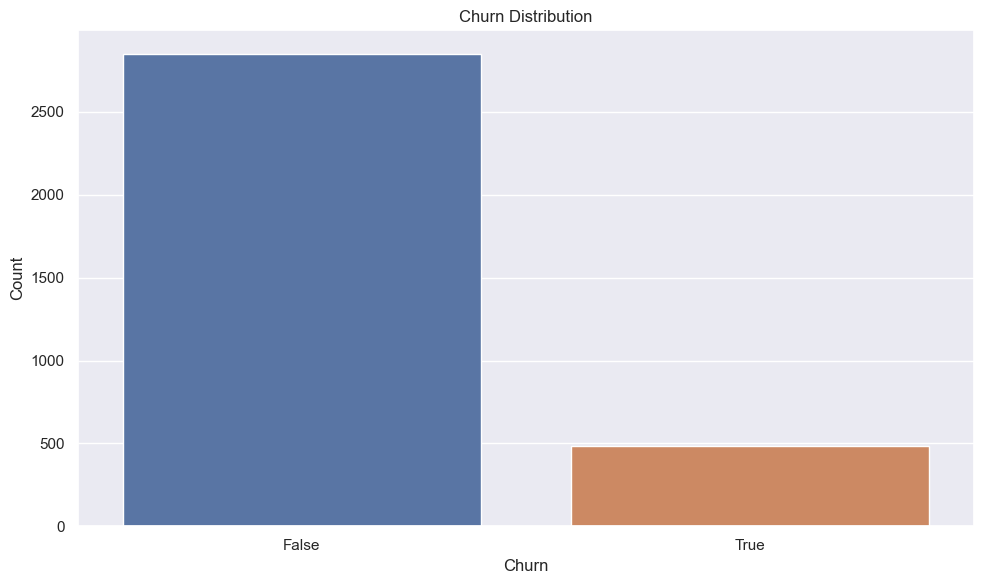

In [9]:
# distribution of the 'Churn' target column

# check the distribution of the unique values
print("Churn counts:")
print(churn_df['Churn'].value_counts())

# check for normalized counts as a percentage
print("\nChurn distribution (%):")
print(churn_df['Churn'].value_counts(normalize=True) * 100)

# visualize with a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=churn_df, palette='deep')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show();

From the bar plot, out of the 3333 customers in the dataset, 483 have churned from the company(i.e. terminated their contract), which is about 14.5% of the total customers. This indicates that the target variable is **highly imbalanced**. This imbalance can negatively impact the performance of the prediction model by influencing the model to make false predictions. Therefore, this class imbalance should be handled before modeling.

#### 3.2.1.2. 'Area_Code' Distribution
In this section, we want to see how the distribution of the customers is with regards to the area code. This will aid in determining the area codes that have the most customers.

Area code counts:
Area_Code
415    1655
510     840
408     838
Name: count, dtype: int64

Area code distribution (%):
Area_Code
415    49.654965
510    25.202520
408    25.142514
Name: proportion, dtype: float64


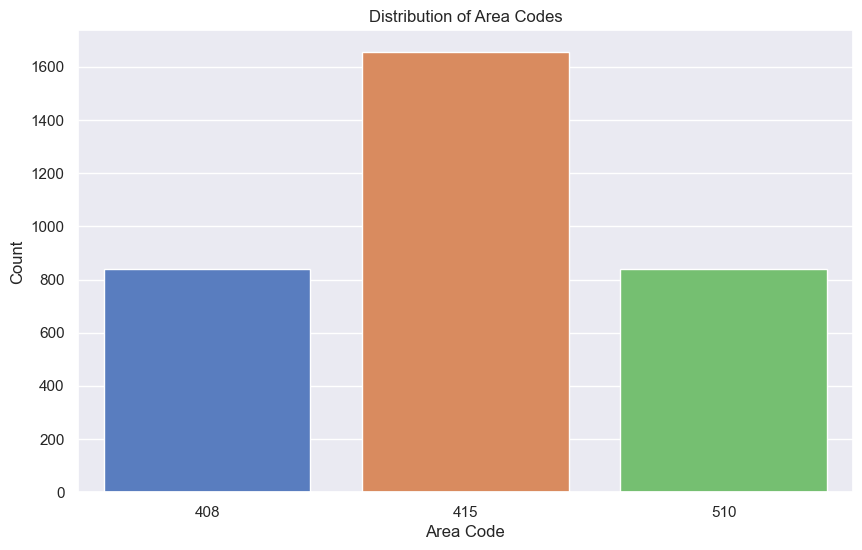

In [10]:
# check the distribution of the unique values
print("Area code counts:")
print(churn_df['Area_Code'].value_counts())

# check for normalized counts as a percentage
print("\nArea code distribution (%):")
print(churn_df['Area_Code'].value_counts(normalize=True) * 100)

# Countplot of area code
plt.figure(figsize=(10, 6))
sns.countplot(x='Area_Code', data=churn_df, palette='muted')
plt.title('Distribution of Area Codes')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

From the plot, area code `415` has a higher number of customers with about **1655 customers**, which accounts for approximately 49.7% of the total number of customers. Area codes `408` and `510` have a close number of customers, with area code `408` having **838 customers** and area code `510` having **840 customers**.

The uneven customer distribution suggests that SyriaTel has a larger customer base concentrated in specific regions. This could indicate:
- Stronger marketing or network presence in those regions.
- Regional preferences for SyriaTel services. 

#### 3.2.1.3. Distribution of categorical features.
In this section, we will explore three main categorical features:
- `State`
- `International_Plan`
- `Voice_Mail_Plan`

I created a function `plot_categorical_distributions` in `utility.py` that will take in a dataframe and feature, and return the distribution of the input feature.

We will start with analyzing the `State` feature.

State counts:
State
WV    106
MN     84
NY     83
AL     80
OH     78
Name: count, dtype: int64


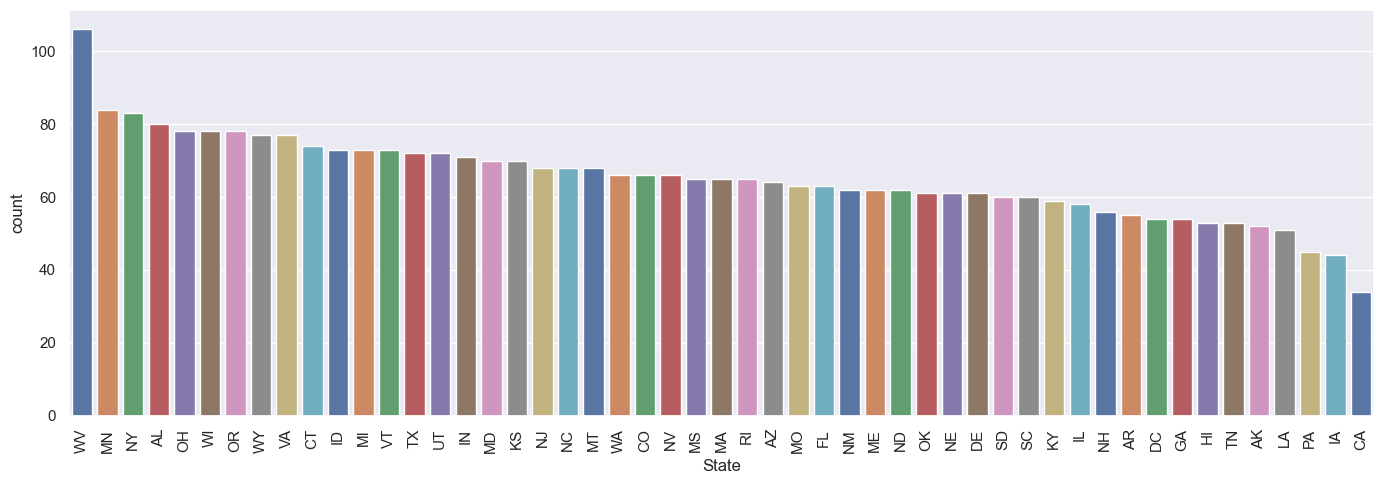

In [11]:
# check the distribution of the unique values
print("State counts:")
print(churn_df['State'].value_counts().head())

# import the function from utility.py
from utility import categorical_distributions

# pass in the dataframe and the 'State' feature
categorical_distributions(churn_df, 'State')

From the plot, the top 5 states from where majority of the customers reside are:
- `West Virginia (WV)`: The state with the highest number of customers `(106)`
- `Minnesota (MN)`: Has about `84` customers
- `New York (NY)`: Has about `83` customers
- `Alabama (AL)`: Has about `80` customers
- `Ohio (OH)`: Has about `78` customers

Next, we will plot the distribution of the `International_Plan` feature.

International Plan counts:
International_Plan
no     3010
yes     323
Name: count, dtype: int64

International Plan distribution (%):
International_Plan
no     90.309031
yes     9.690969
Name: proportion, dtype: float64


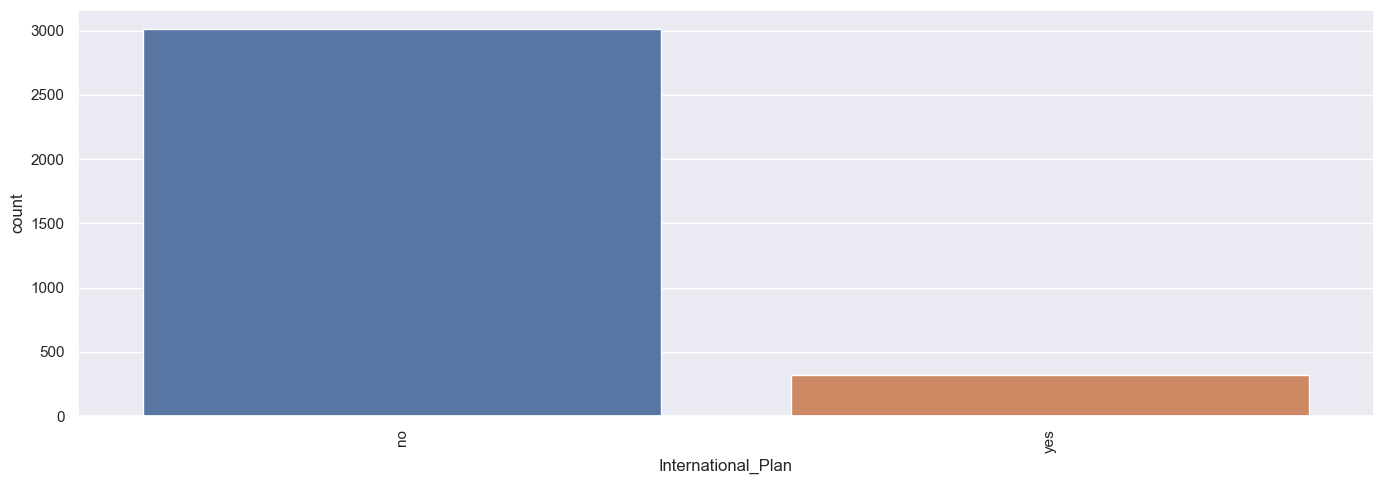

In [12]:
# check the distribution of the unique values
print("International Plan counts:")
print(churn_df['International_Plan'].value_counts())

# check for normalized counts as a percentage
print("\nInternational Plan distribution (%):")
print(churn_df['International_Plan'].value_counts(normalize=True) * 100)

# pass in the dataframe and the 'International_Plan' feature
categorical_distributions(churn_df, 'International_Plan')

From the plot, about `323` customers, which is about **9.7%** of the total customers have an international plan.

Finally, we will plot the distribution of the `Voice_Mail_Plan` feature.

Voice Mail Plan counts:
Voice_Mail_Plan
no     2411
yes     922
Name: count, dtype: int64

Voice Mail Plan distribution (%):
Voice_Mail_Plan
no     72.337234
yes    27.662766
Name: proportion, dtype: float64


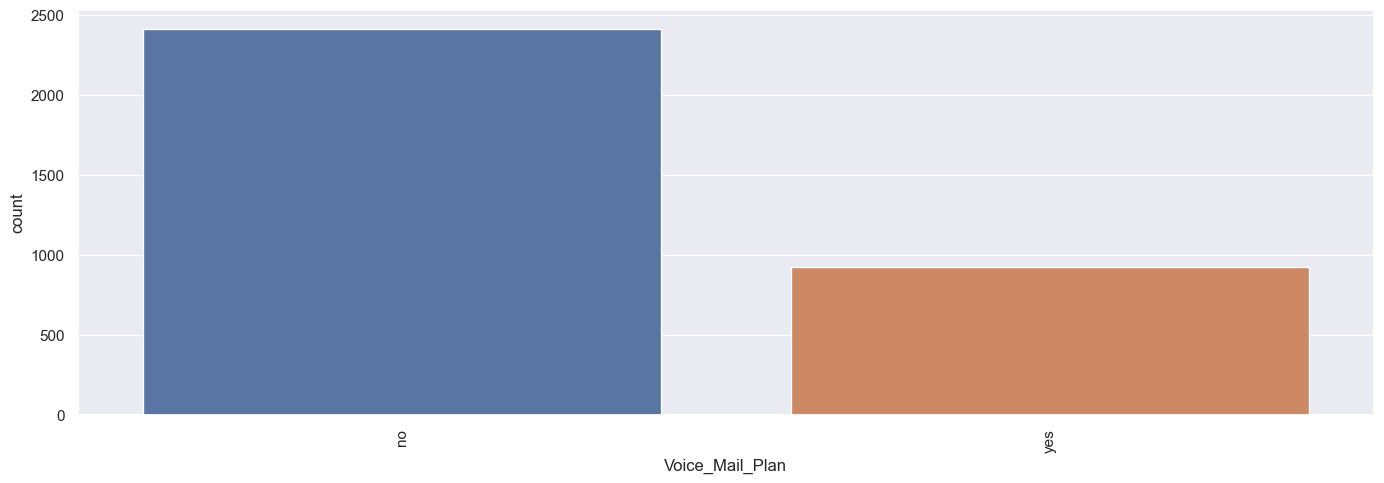

In [13]:
# check the distribution of the unique values
print("Voice Mail Plan counts:")
print(churn_df['Voice_Mail_Plan'].value_counts())

# check for normalized counts as a percentage
print("\nVoice Mail Plan distribution (%):")
print(churn_df['Voice_Mail_Plan'].value_counts(normalize=True) * 100)

# load the categorical_distributions function and pass in the arguments
categorical_distributions(churn_df, 'Voice_Mail_Plan')

From the plot, `922` customers, which is about 27.7% of the total number of customers have a voice mail plan.

#### 3.2.1.4. Numerical Features Distribution.
In this section, we will plot the distributions of all the numerical features, with `Kernel Density Estimation (KDE)` curves. This will aid in:
1. Understanding customer usage patterns, with features like `Total_Day_Minutes`. This will inform the usage of the services by the customers.

2. Detecting outliers in the dataset. For example, outliers in `total charge` or `minutes` could indicate erratic usage linked to churn.

I have created a function `numerical_distributions` in `utility.py`, that takes in the dataframe, and a list of numerical features, and returns the KDE distribution plots of each feature.

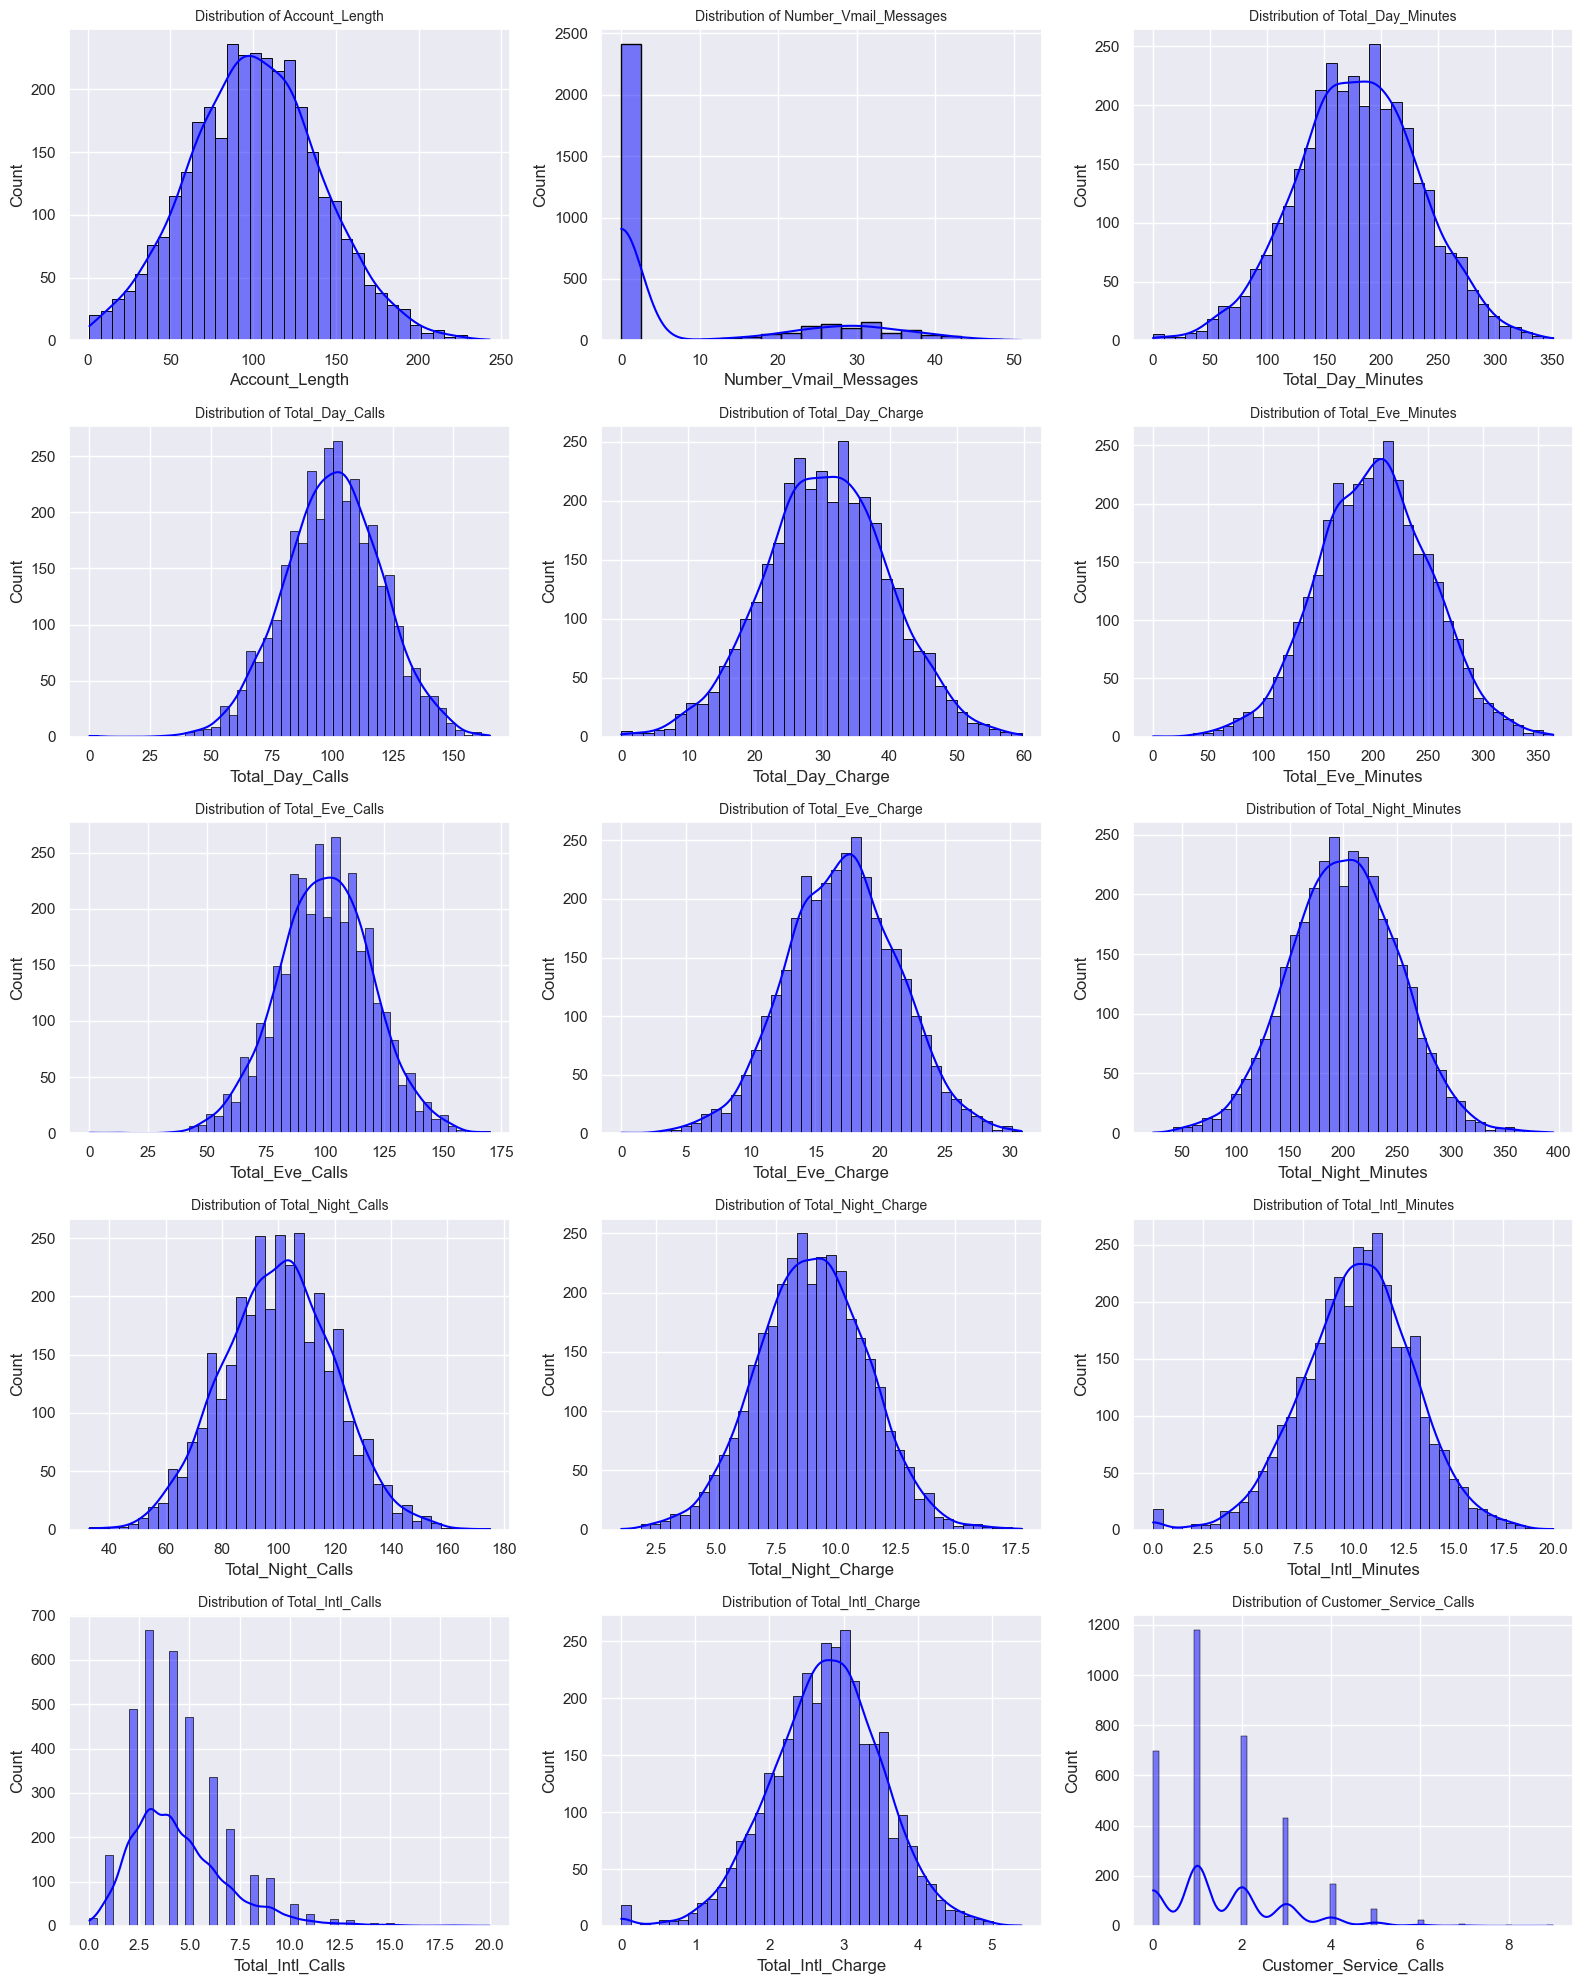

In [14]:
# define the numerical features
numerical_features = [
    'Account_Length', 'Number_Vmail_Messages', 'Total_Day_Minutes', 'Total_Day_Calls', 
    'Total_Day_Charge', 'Total_Eve_Minutes', 'Total_Eve_Calls', 'Total_Eve_Charge', 
    'Total_Night_Minutes', 'Total_Night_Calls', 'Total_Night_Charge', 'Total_Intl_Minutes', 
    'Total_Intl_Calls', 'Total_Intl_Charge', 'Customer_Service_Calls'
]

# import the function from 'utility.py'
from utility import numerical_distribution

# call the 'numerical_distributions' function
numerical_distribution(churn_df, numerical_features)

From the plot, all the features, apart from `Customer_Service_Calls` and `Number_Vmail_Messages` follow a Normal distribution. Despite the `Total_Intl_Calls` feature being skewed to the right, it is still normally distributed. 

### 3.2.2. Bivariate Analysis.
Bivariate analysis in EDA aids in understanding the relationship between two variables - in this case the relationship between the independent features and the target variable `Churn`. This is crucial for identifying the predictive features to implement in modeling.

#### 3.2.2.1. Categorical features vs Churn
In this section, we will use bar plots to analyze the relationship between the categorical features and `Churn`. The categorical features we will use are: `State`, `International_Plan`, and `Voice_Mail_Plan`.

This will help us in answering questions like:
- Do customers with an international plan or voice mail plan churn more?

I have created a function `categorical_churn` that takes in a dataframe and a feature, and returns the countplot of each feature, with churn as a comparative variable.

We will first plot the `State` feature

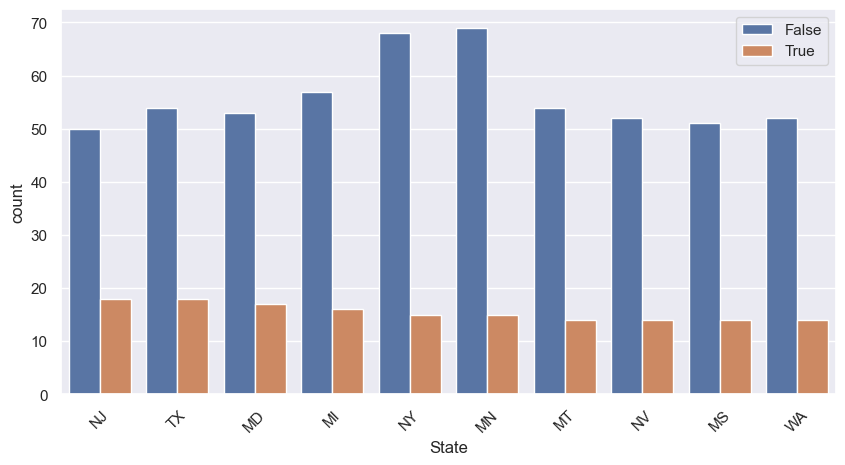

In [15]:
# import the function from utility.py
from utility import categorical_churn

# pass the dataframe and feature
categorical_churn(churn_df, 'State')

From the plot, majority of the customers who churned came from `New Jersey`, `Texas`, `Maryland`, `Miami`, and `New York`.

Next, we will plot the `International_Plan` feature.

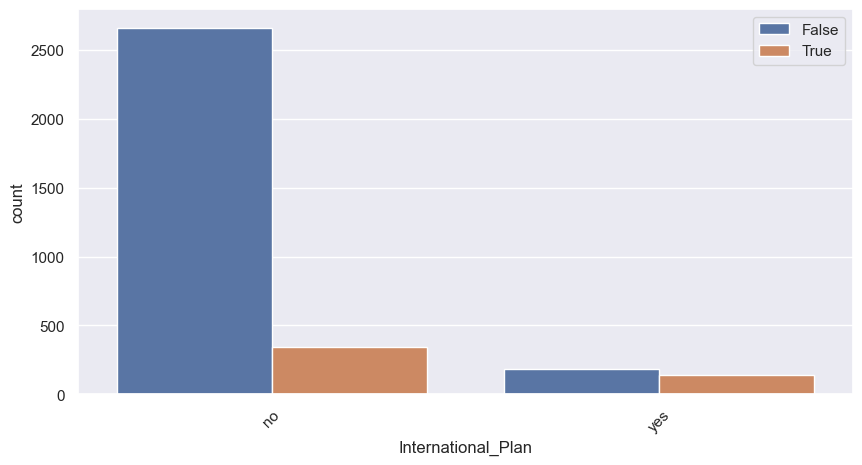

In [16]:
# pass the dataframe and feature
categorical_churn(churn_df, 'International_Plan')

From the plot, most of the customers who churned ***did not*** have an international plan.

Finally, we will plot the `Voice_Mail_Plan` feature.

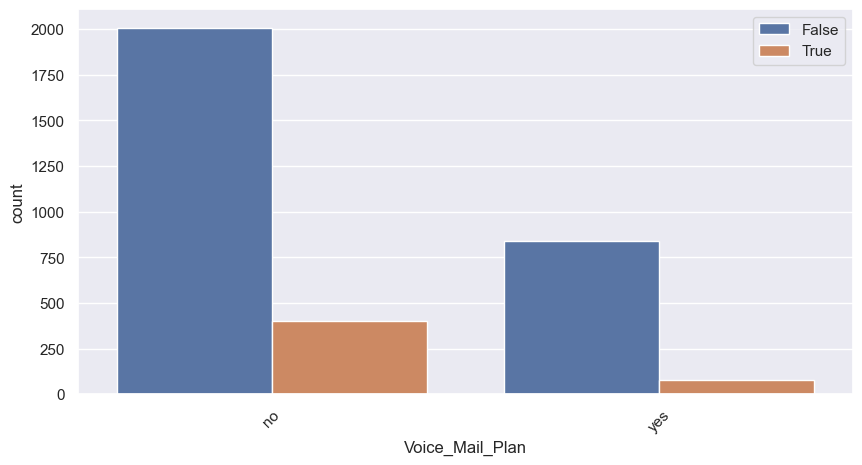

In [17]:
# pass the dataframe and feature
categorical_churn(churn_df, 'Voice_Mail_Plan')

From the plot, most of the customers who churned ***did not*** have a voice mail plan.

#### 3.2.2.2. Customer Service Calls agains Churn
In this section, we want to visualize the variation in churn with the number of `customer service calls`. This will help us in determining whether customer service calls are a major contributor towards customer churning.

We will also implement a hue of `Area_Code` in order to see the area code that had the highest rate of churn.

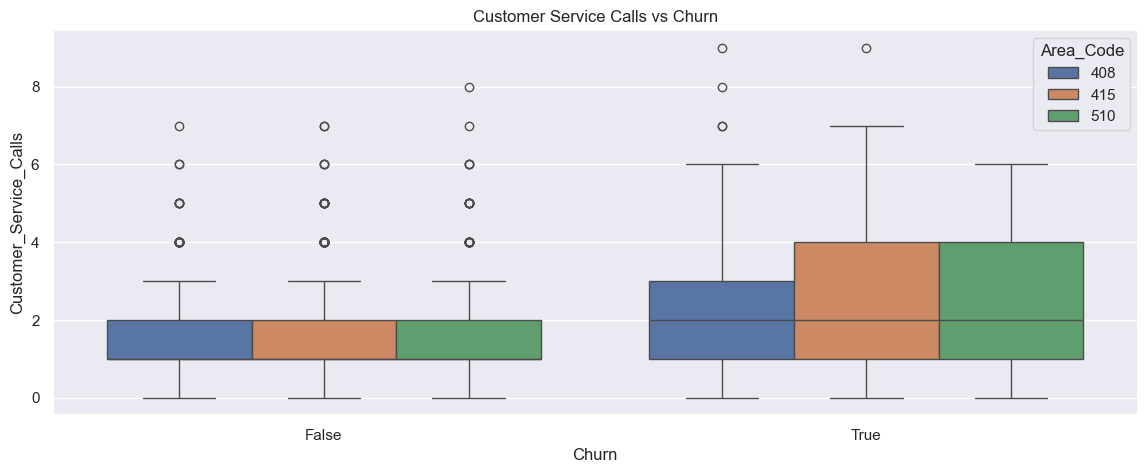

In [18]:
# boxplot to show area code with the highest churn
plt.figure(figsize=(14, 5))
sns.boxplot(data=churn_df, x='Churn', y='Customer_Service_Calls', hue='Area_Code', palette='deep')
plt.title('Customer Service Calls vs Churn')
plt.show()

From the plot, most of the customers who churned came from area code `415` and `510`. This also indicates that these customers received 4 customer service calls, which might have influenced their churning from the company. It is also evident that there are a number of outliers, which will be dealt with.

#### 3.2.2.3. Numerical Features vs Churn
In this section, we will investigate the distribution of certain numerical columns with the churn rate. Specifically, we will use: `Total_Day_Charge`, `Total_Eve_Charge`, `Total_Night_Charge`, and `Total_Intl_Charge`. These 4 plots will help us in understanding the variation of the charging rates with the churn rate. We will use `KDE` plots to visualize these distributions.

I have created a function `kde_plots_with_churn`, that will take in the dataframe, feature and the charge type(day, evening, night or international)

We will first plot the `Total_Day_Charge` distribution.

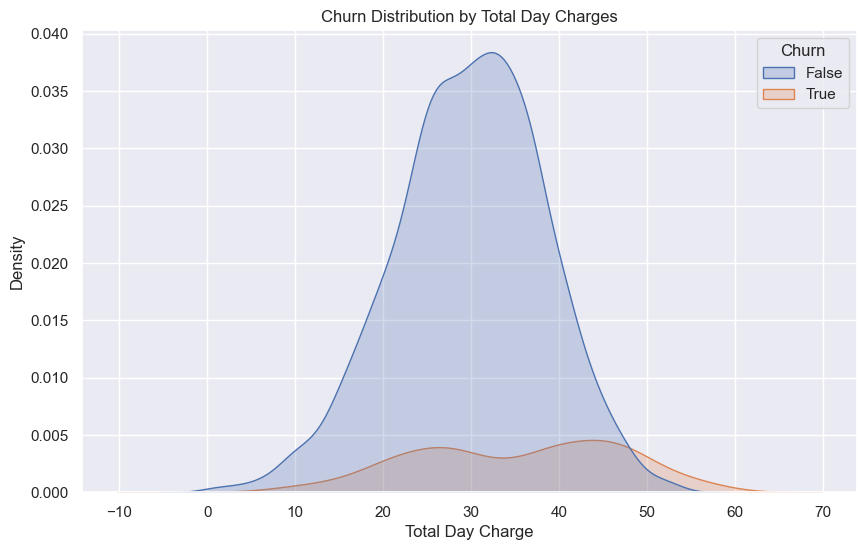

In [19]:
# import the function from utility.py
from utility import kde_plots_with_churn

# pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Day_Charge', 'Day')

This KDE plot shows the distribution of **Total Day Charges** for customers who churned (`Churn = True`) vs those who didn't (`Churn = False`)
From the plot, the orange (churned) curve has a longer right tail, and maintains density at higher values of day charges. This implies that customers who churn tend to have ***higher day charges*** than those who do not churn.

Next, we will plot the `Total_Eve_Charge` feature

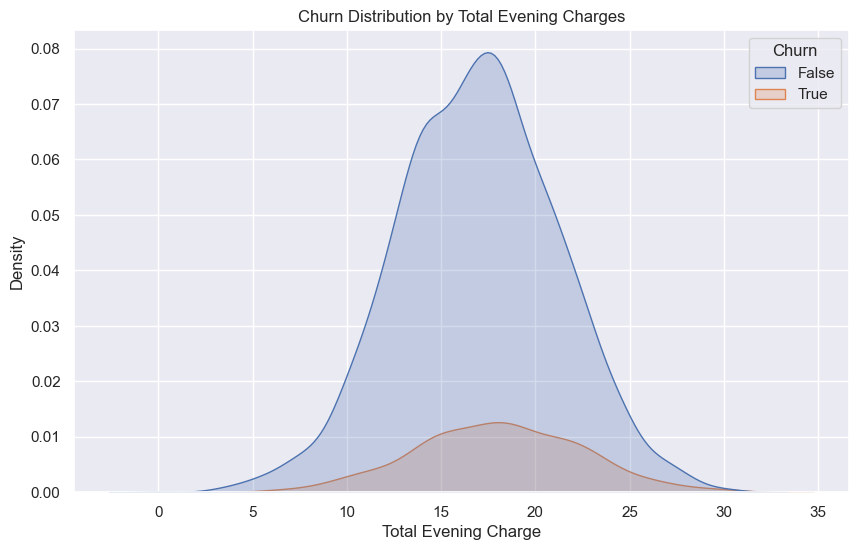

In [20]:
# pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Eve_Charge', 'Evening')

In this KDE plot, The non-churned group (blue) has a tighter and higher peak between 15-20, while the churned group (orange) is lower and flatter, with a subtle shift towards higher evening charges. 

The churned group maintains more density beyond ~25 compared to the non-churned group, similar to the trend seen with the day charges. From this, customers who churned show a _slight tendency_ to have higher evening charges, but the separation between churned and non-churned is ***less distinct***.

Next, we will plot the `Total_Night_Charge` feature

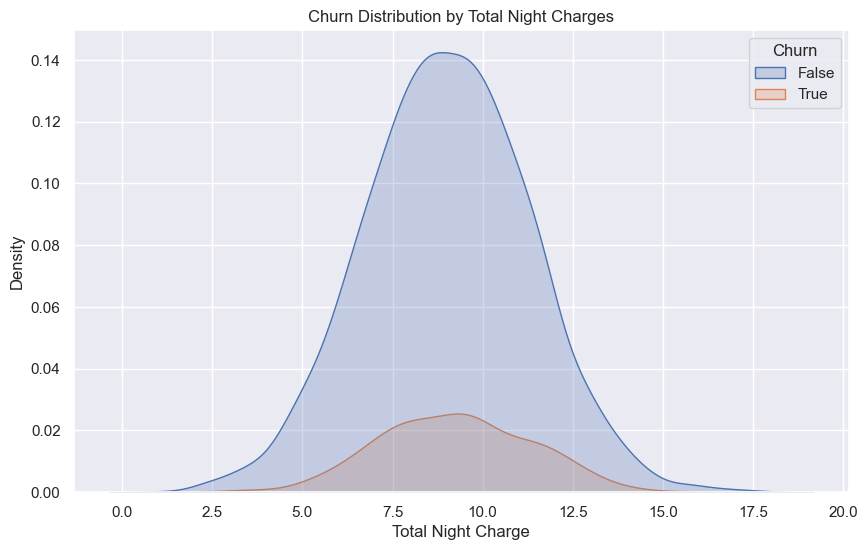

In [21]:
# pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Night_Charge', 'Night')

From this KDE plot, The two curves **heavily overlap**, implying that most customers, whether they churned or not, had similar total night charges. In this scenario, we cannot say for sure that majority of the customers who churned had a higher night charge.

Finally, we will plot the `Total_Intl_Charge` feature

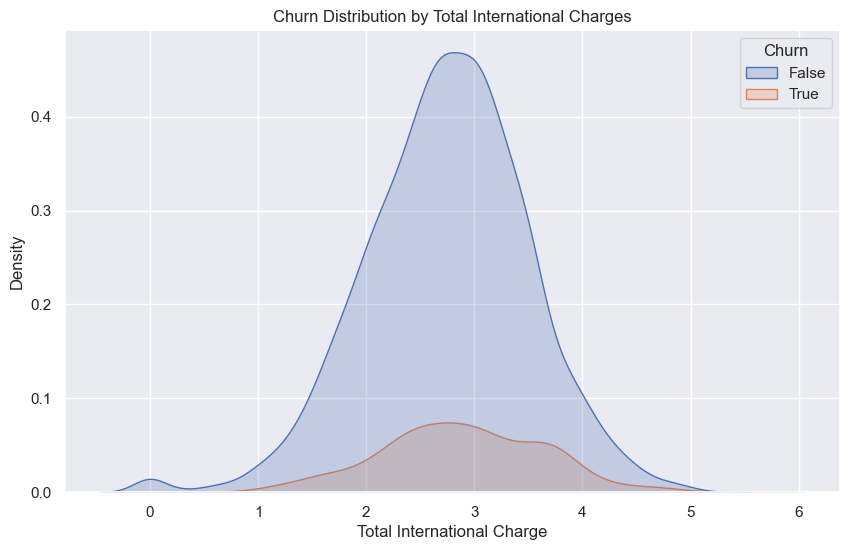

In [22]:
# pass the dataframe, feature and charge type
kde_plots_with_churn(churn_df, 'Total_Intl_Charge', 'International')

From the density plot, The non-churning curve has a tight bell-shaped distribution centered around `2.5-3.0` for international charges, which suggests that most loyal customers have moderate international usage patterns, with relatively little variation.

On the other hand, the churning curve shows a broader, flatter distribution that extends further to the right, with multiple peaks around `3.0-4.0`. This indicates churned customers tend to have higher international charges, and more varied usage patterns

Based on this analysis, customers with very low international charges (`< 1.0`) rarely churn, suggesting basic users tend to stay. The "tail" of high international charges (`> 4.0`) is dominated by churned customers, suggesting very high international usage may be a churn risk factor.

### 3.2.3. Feature correlation
In this section, we will use a correlation heatmap to measure the correlation between the features and the target variable.

I have created a function `correlation_heatmap` that takes in a dataframe and returns a correlation heatmap of the various numerical columns with the target variable.

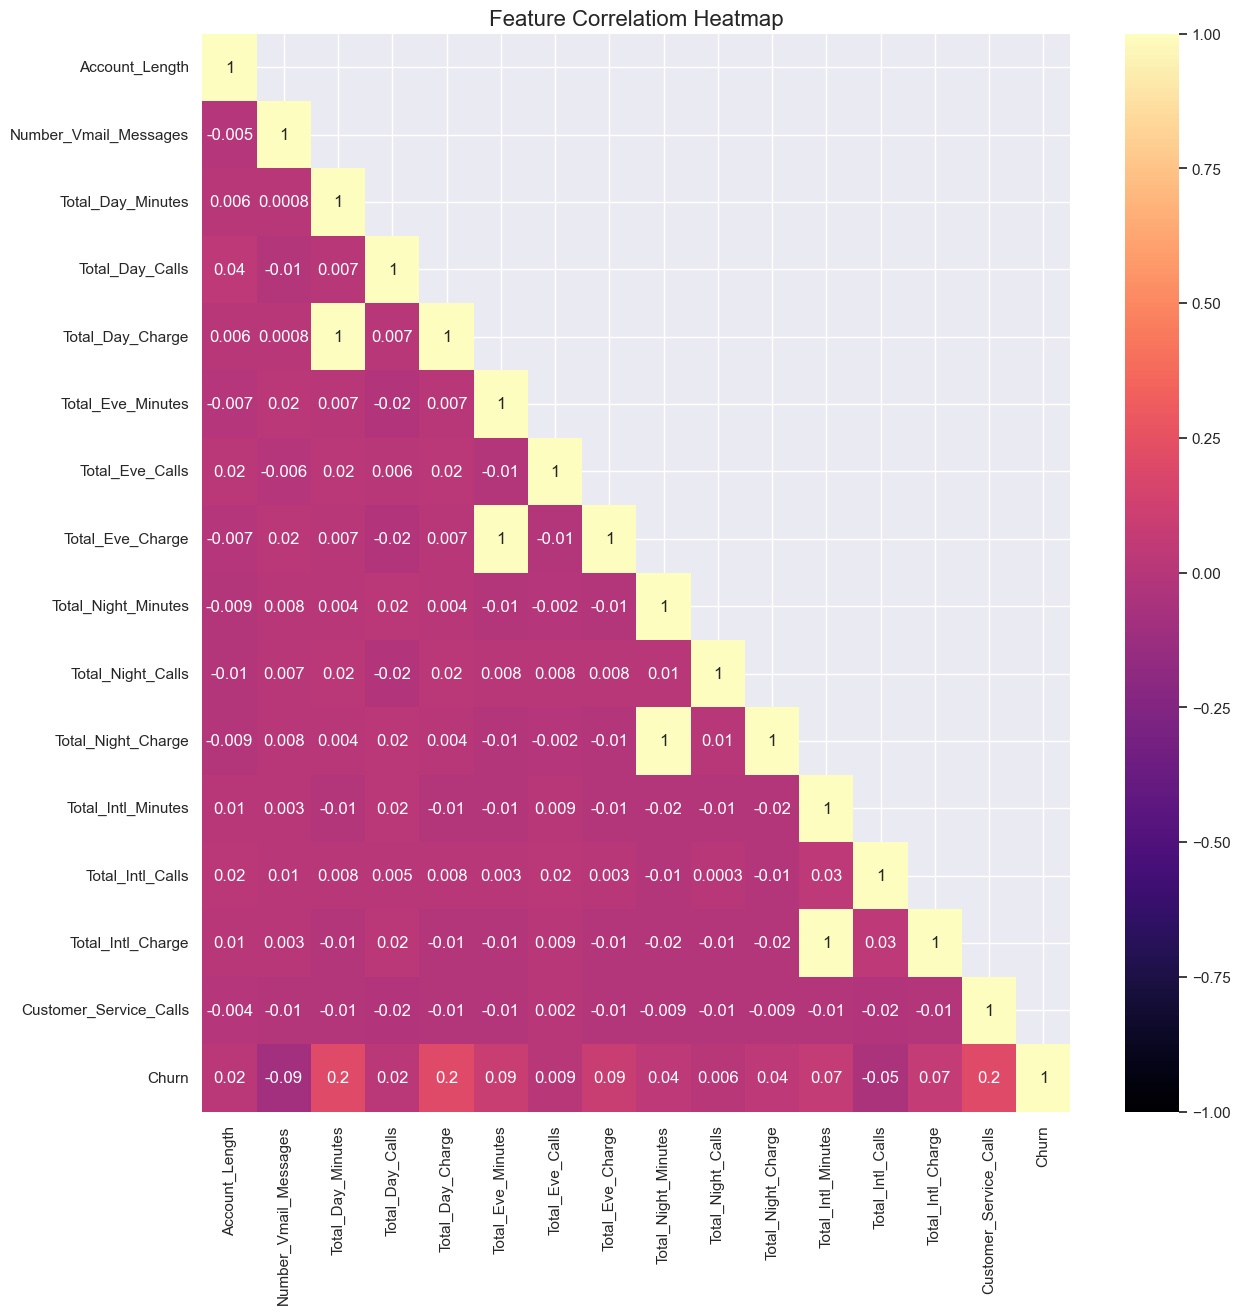

In [23]:
# import the function fro utility.py
from utility import correlation_heatmap

# pass in the dataframe
correlation_heatmap(churn_df)

We may have to deal with the class imbalance for a more robust model performance.

In [56]:
# data preprocessing

# convert 'yes'/'no' to 1/0 by binary mapping
churn_df['international plan'] = churn_df['international plan'].map({'yes': 1, 'no': 0})
churn_df['voice mail plan'] = churn_df['voice mail plan'].map({'yes': 1, 'no': 0})
churn_df['churn'] = churn_df['churn'].astype(int)

# Encode 'state' and 'phone number' as numerical labels
le = LabelEncoder()
churn_df['state'] = le.fit_transform(churn_df['state'])
churn_df['phone number'] = le.fit_transform(churn_df['phone number'])

# save the cleaned & preprocessed dataset
churn_df.to_csv('data/churn_cleaned.csv', index=False)

# display the first 5 rows
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,NaN,NaN,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,NaN,NaN,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,NaN,NaN,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,NaN,NaN,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,NaN,NaN,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Now that our data is preprocessed, we can proceed to split into train and test sets.

In [27]:
# define X and y variables
X = churn_df.drop(columns='churn', axis=1)
y = churn_df['churn']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# scale the train and test features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# display the shape of thr train and test sets
print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of scaled X_train: (2999, 20)
Shape of scaled X_test: (334, 20)
Shape of y_train: (2999,)
Shape of y_test: (334,)


In [29]:
# instantiate a Logistic regression model
log_model = LogisticRegression()

# fit the training data
log_model.fit(X_train_scaled, y_train)

# make predictions on test set
y_pred_log = log_model.predict(X_test_scaled)

# compute the accuracy of the model
log_acc = accuracy_score(y_test, y_pred_log)
print("Logistic Regression model accuracy:", log_acc)

Logistic Regression model accuracy: 0.844311377245509


In [30]:
# display the classification report
report = classification_report(y_true=y_test, y_pred=y_pred_log)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       286
           1       0.41      0.19      0.26        48

    accuracy                           0.84       334
   macro avg       0.64      0.57      0.59       334
weighted avg       0.81      0.84      0.82       334



In [16]:
# compute the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_log)
conf_matrix

array([[282,   4],
       [ 46,   2]])

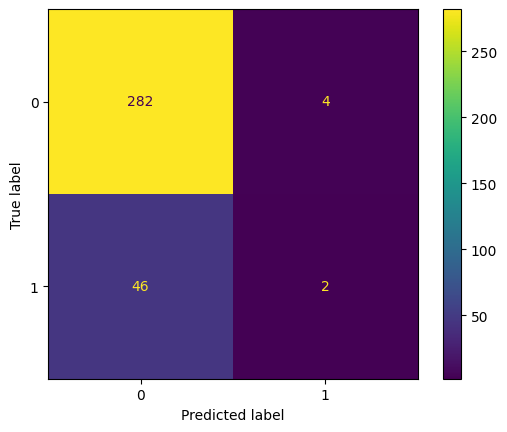

In [17]:
# plot the confusion matrix
conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
conf_disp.plot()

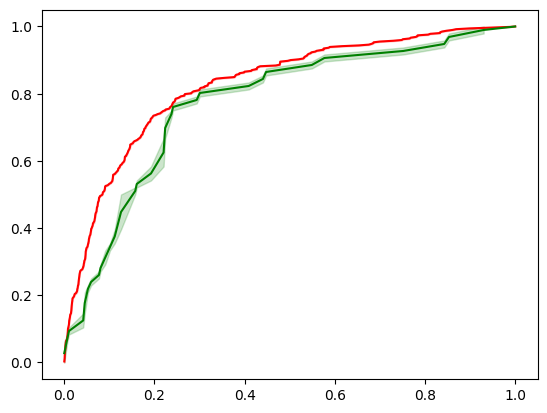

In [31]:
# define the train false positive and true positive rates
fpr_train, tpr_train, thres = roc_curve(y_true=y_train, y_score=log_model.decision_function(X_train_scaled))

# define the test false positive and true positive rates
fpr_test, tpr_test, _ = roc_curve(y_true=y_test, y_score=log_model.decision_function(X_test_scaled))

# plot the ROC curve
sns.lineplot(x=fpr_train, y=tpr_train, color="red")
sns.lineplot(x=fpr_test, y=tpr_test, color="green")
plt.show();

In [32]:
# compute the area under the curve
auc_score = auc(fpr_test, tpr_test)
auc_score

np.float64(0.7755681818181819)

In [ ]:
# # hyperparameter tuning for model optimization using GridSearchCV

# define the scope of the hyperparameters
# param_grid_log = [
#     # liblinear supports l1 and l2
#     {
#         'penalty': ['l1', 'l2'],
#         'C': np.logspace(-4, 4, 10),
#         'solver': ['liblinear'],
#         'max_iter': [1000]
#     },
#     # lbfgs, newton-cg, sag support only l2 or none
#     {
#         'penalty': ['l2', 'none'],
#         'C': np.logspace(-4, 4, 10),
#         'solver': ['lbfgs', 'newton-cg', 'sag'],
#         'max_iter': [1000]
#     },
#     # saga supports all penalties
#     {
#         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#         'C': np.logspace(-4, 4, 10),
#         'solver': ['saga'],
#         'l1_ratio': [0, 0.5, 1],  # Only used with elasticnet
#         'max_iter': [1000]
#     }
# ]

# # implement the GridSearchCV function
# grid_model_log = GridSearchCV(log_model, param_grid=param_grid_log, cv=10, verbose=True, n_jobs=-1, error_score='raise')

# # fit the training data and determine best model parameters
# grid_model_log.fit(X_train_scaled, y_train)
# print("Optimal model hyperparameters:", grid_model_log.best_params_)
# print("Best model estimators:", grid_model_log.best_estimator_)

In [42]:
# deal with imbalanced classes

# check the unique values in y_train
y_train.value_counts()

churn
0    2564
1     435
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

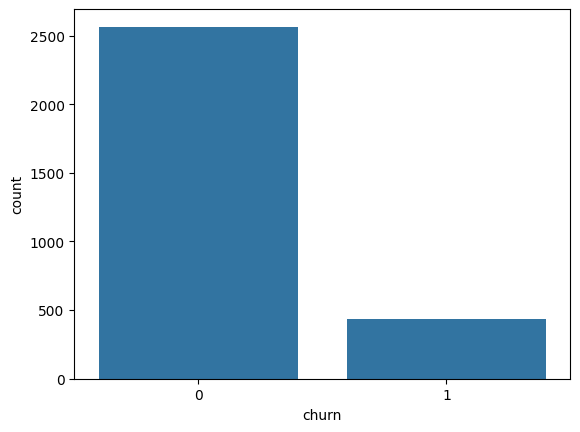

In [43]:
# plot the unique values
sns.countplot(x=y_train)

In [45]:
# implement SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# create SMOTE X and y variables for the train set
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# check the unique values in y_train_smote
y_train_smote.value_counts()

churn
0    2564
1    2564
Name: count, dtype: int64

In [47]:
# fit the Logistic Regression model with the SMOTE train dataset
log_model.fit(X_train_smote, y_train_smote)

# model prediction on test dataset
y_pred_smote_log = log_model.predict(X_test_scaled)

# display the classification report
report_smote = classification_report(y_true=y_test, y_pred=y_pred_smote_log)
print(report_smote)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       286
           1       0.33      0.67      0.44        48

    accuracy                           0.75       334
   macro avg       0.63      0.72      0.64       334
weighted avg       0.85      0.75      0.78       334



In [48]:
print(accuracy_score(y_test, y_pred_smote_log))

0.7544910179640718


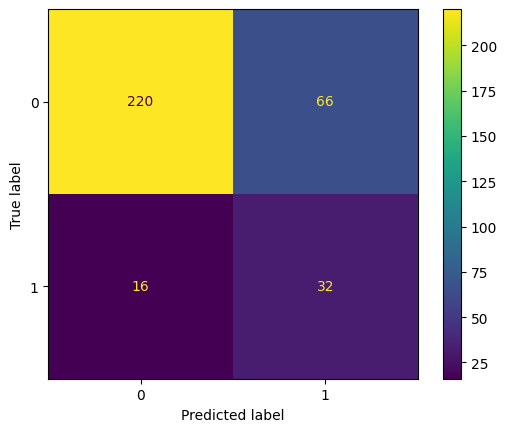

In [49]:
# compute the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_smote_log)
conf_matrix

# plot the confusion matrix
conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
conf_disp.plot()

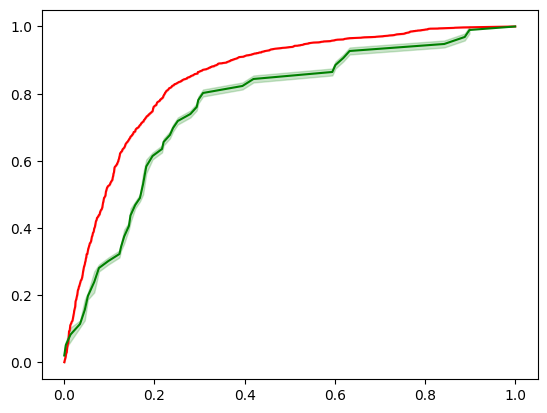

In [51]:
# define the train false positive and true positive rates
fpr_train_smote, tpr_train_smote, thres = roc_curve(y_true=y_train_smote, y_score=log_model.decision_function(X_train_smote))

# define the test false positive and true positive rates
fpr_test, tpr_test, _ = roc_curve(y_true=y_test, y_score=log_model.decision_function(X_test_scaled))

# plot the ROC curve
sns.lineplot(x=fpr_train_smote, y=tpr_train_smote, color="red")
sns.lineplot(x=fpr_test, y=tpr_test, color="green")
plt.show();